# A sphere with dleto

First load Dleto

In [1]:
include("../Dleto.jl") 


plotTensor (generic function with 2 methods)

Now lets approximate the surface of a sphere as an array and add some randomization surrounding it.  

The command `randomSurfaceTensor(x,y,z,t)` builds a tensor with value supported randomly nearby the points `x[i]+y[j]+z[k]=0`.
So to get a sphere $r^2=(x-a)^2+(y-b)^2+(z-c)^2$ we can use values `x[i], y[j], z[k]` near $(i-c)^2-r^2/3$.  Thus, 
$$0\approx x[i]+y[j]+z[k]=((i-a)^2-r^2/3)+((j-b)^2-r^2/3)+((k-c)^2-r^2/3)$$
so that $$i^2+j^2+k^2\approx r^3$$

First let us make a sphere with 11 pixels, i.e. indices $i,j,k\in \{0,\ldots, 10\}$ centered at $(5,5,5)$ radius $5$.

Fiddle with the parameters until you see their effect.  For example you might not wish to fit the full sphere, you can edit the range form (0:1:10) for one of the axes to make is shorter.  It will cut through the sphere.

In [2]:
a = 5.0; b = 5.0; c = 5.0; r = 5.0;
Xes = [(0:1:10)...] .|> x-> ((x-a)*(x-a)- (r*r)/3.0)
Yes = [(0:1:10)...] .|> y-> ((y-b)*(y-b)- (r*r)/3.0)
Zes = [(0:1:10)...] .|> z-> ((z-c)*(z-c)- (r*r)/3.0)


tensorSphere = randomSurfaceTensor( Xes, Yes, Zes, 1.5)



11×11×11 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0   0.0         0.0         0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0         0.0         0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0         0.0         0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0         0.0         0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        -1.07526     0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  -0.0137022  -0.00463233  0.195834  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0         1.71444     0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0         0.0         0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0         0.0         0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0         0.0         0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0         0.0         0.0       0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0   0.0          0.0        0.0       …  0.0       0.0       0.0  0.0
 0.0  0.0   0.0          0.0        0.0     

It will help to see the tensor as a graphic we can visualize as 3D.  There are many visualization tools in Jupyter, but to pick just one we can use Plotly.


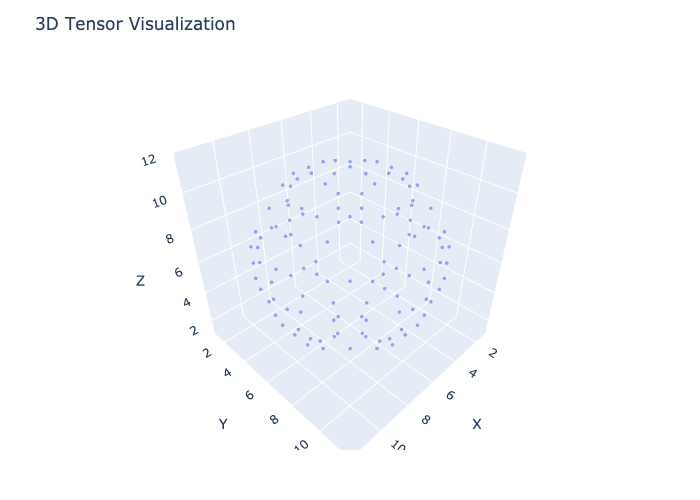

In [3]:
plotTensor(tensorSphere)

Now lets jump to something larger.  Radius 50, centered at (50, 50, 50).  It will make a 101 x 101 x 101 tensor.

In [4]:
Xes = [(0:1:50)...] .|> x-> ((x-25.0)*(x-25.0)- (25.0*25.0)/3.0)

tensorSphere51 = randomSurfaceTensor( Xes, Xes, Xes, 1.5); # No need to print.
saveTensorToFile(tensorSphere51, "sphere-51x51x51.txt"); # Save instead.


We can also plot it, but be warned if you include too many points the visualization will get slow, so you can add a threshold of how close to 0 you plan to drop.

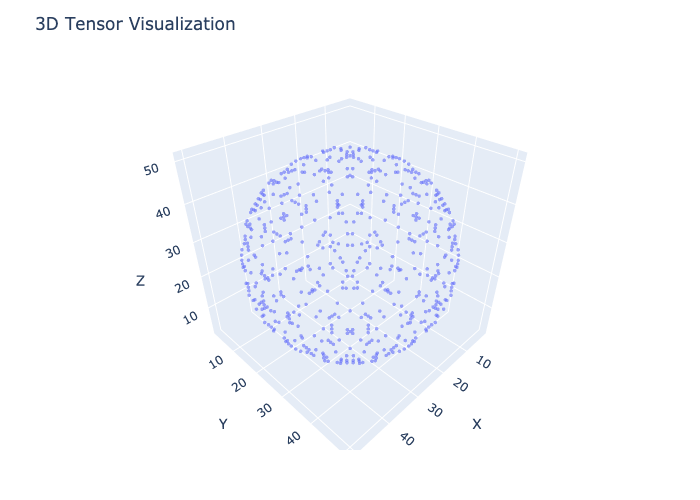

In [5]:
plotTensor(tensorSphere51, 0.001)

Now lets randomize! We have a tool to do this but it stores the output along side the matrices used to randomize it.  So you will need to call the tensor up through the record, just add `name.tensor`.

Here is our small sphere randomized, it likely looks completely filled in like dense tensor.

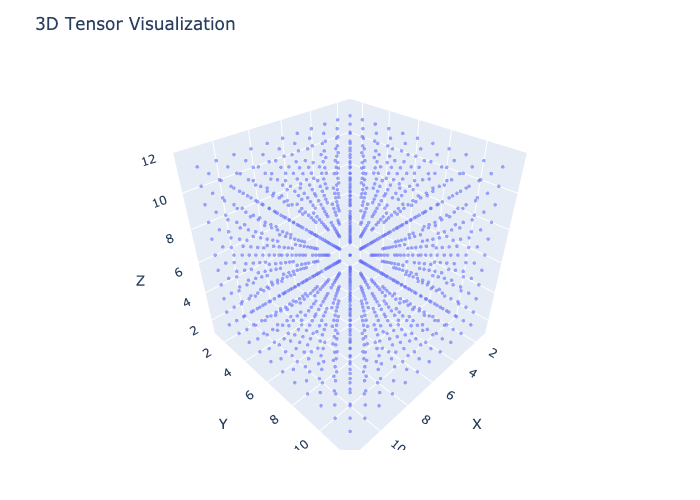

In [6]:
rTensorSphere = randomizeTensor(tensorSphere)
plotTensor(rTensorSphere.tensor)

And here is our larger sphere randomized.  This will be slow to plot as it is lots of values and in fact it some plot software just shows nothing.

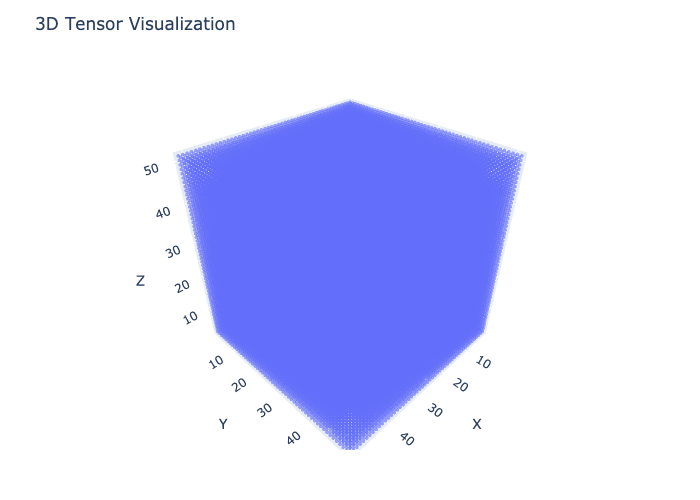

In [7]:
rTensorSphere51 = randomizeTensor(tensorSphere51)
saveTensorToFile(rTensorSphere51.tensor, "sphere-51x51x51-rand.txt"); # Save instead.
plotTensor(rTensorSphere51.tensor, 0.0001) # If too dense then visualization may fail.

We can see that the tensor changed by looking at a slice.

In [8]:
tensorSphere51[:,:,10]


51×51 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    

In [9]:
rTensorSphere51.tensor[:,:,10]

51×51 Matrix{Float64}:
  0.0472441    0.230941    0.000211902  …  -0.0250462    0.000839377
  0.0121224   -0.0949415   0.079267        -0.0318321   -0.056476
  0.0983004   -0.0699386  -0.0138843       -0.109294    -0.0380967
  0.108802     0.028026    0.0144705       -0.0323602   -0.0620894
 -0.0581893    0.0793171   0.0230998       -0.0394322    0.0268574
 -0.0161641    0.139081    0.104669     …  -0.0498705    0.0747576
 -0.0757293    0.184884   -0.0538969       -0.0521689    0.0676527
 -0.00159174  -0.0363196  -0.109333         0.00329373   0.00753757
  0.0702764   -0.0412771  -0.0546056        0.0871157    0.125712
 -0.0250075    0.0913873  -0.0138995        0.0939302   -0.0600283
  ⋮                                     ⋱                ⋮
  0.121768    -0.0587116   0.0924868       -0.0404405   -0.00302125
  0.0581834   -0.120104   -0.0362458       -0.0329686   -0.0606834
 -0.0765436    0.151266   -0.0389106        0.0176092    0.166289
  0.0980377   -0.148283   -0.0622856    …   0.

So no let us try to stratify.

eigens[1] = [-6.5042935327856406e-15, -1.0607611990945901e-15, 1.939149662588919e-15, 1.3621865447937034e-14, 1.085046944778977, 2.0603999031332485, 2.290447810015995, 3.0520629137196282, 3.1792849851949754, 3.7928755777024628, 3.91227491116363, 4.064890432966175, 4.409796967958071, 4.549099576623791, 4.710324276782411, 4.815869815067378, 4.90010517338905, 4.956498179101887, 5.245273886895717, 5.299695886800169]


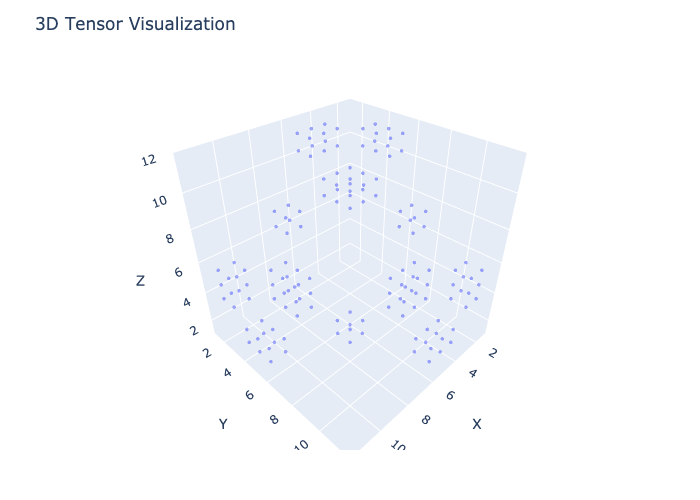

In [11]:
resRandomSphere=toSurfaceTensor(rTensorSphere.tensor)
plotTensor(resRandomSphere.tensor, 0.000001)

Now on the larger sphere.

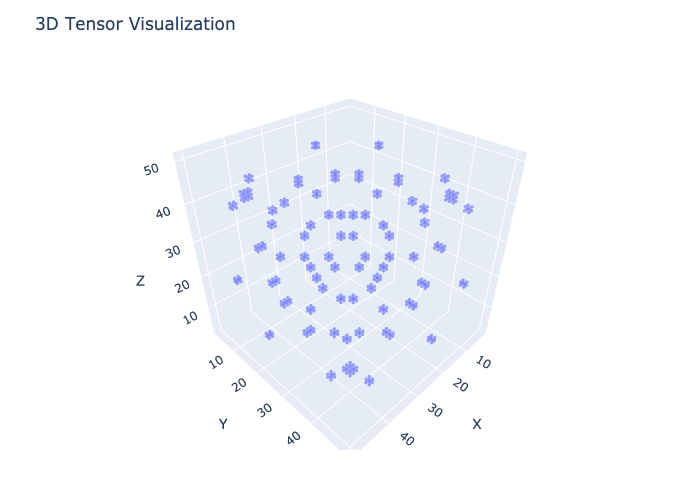

In [12]:
resTensorSphere51=toSurfaceTensor(rTensorSphere51.tensor)
saveTensorToFile(resTensorSphere51.tensor, "sphere-51x51x51-recov.txt"); # Save .
plotTensor(resTensorSphere51.tensor, 0.000001) ## try to plot
